# Thermal data analysis

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import PIL.ExifTags

## Analysis 101

As with the rest of the data, the first step is to pick a sample image and check for extra information in its EXIF fields

In [3]:
image = cv2.imread('Thermal/ny_0.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

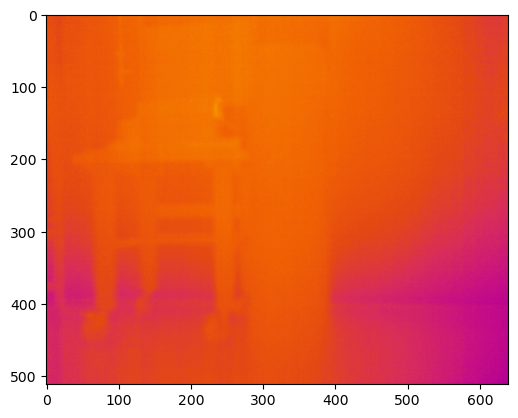

In [4]:
plt.imshow(image)

In [12]:
def get_exif(image_path):
    img = PIL.Image.open(image_path)
    try:
        exif = {
            PIL.ExifTags.TAGS[k]: v
            for k, v in img._getexif().items()
            if k in PIL.ExifTags.TAGS
        }
        return exif
    except AttributeError:
        return "No EXIF data available!"

for pole_name in ['ny', '5', '6', '30', '41']:
    for rotation in [0, 90, 180, 270]:
        print(get_exif(f'Thermal/{pole_name}_{rotation}.bmp'))

No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!
No EXIF data available!


None of the images have EXIF data, so there is nothing more to analyse on that respect.

## Comparing the thermal images with the RGB images

For beginning the analysis of the thermal images, a good starting point can be comparing the thermal images with the RGB images, to see if there is any correlation with distinctive features of the poles (cracks, rot, etc.)

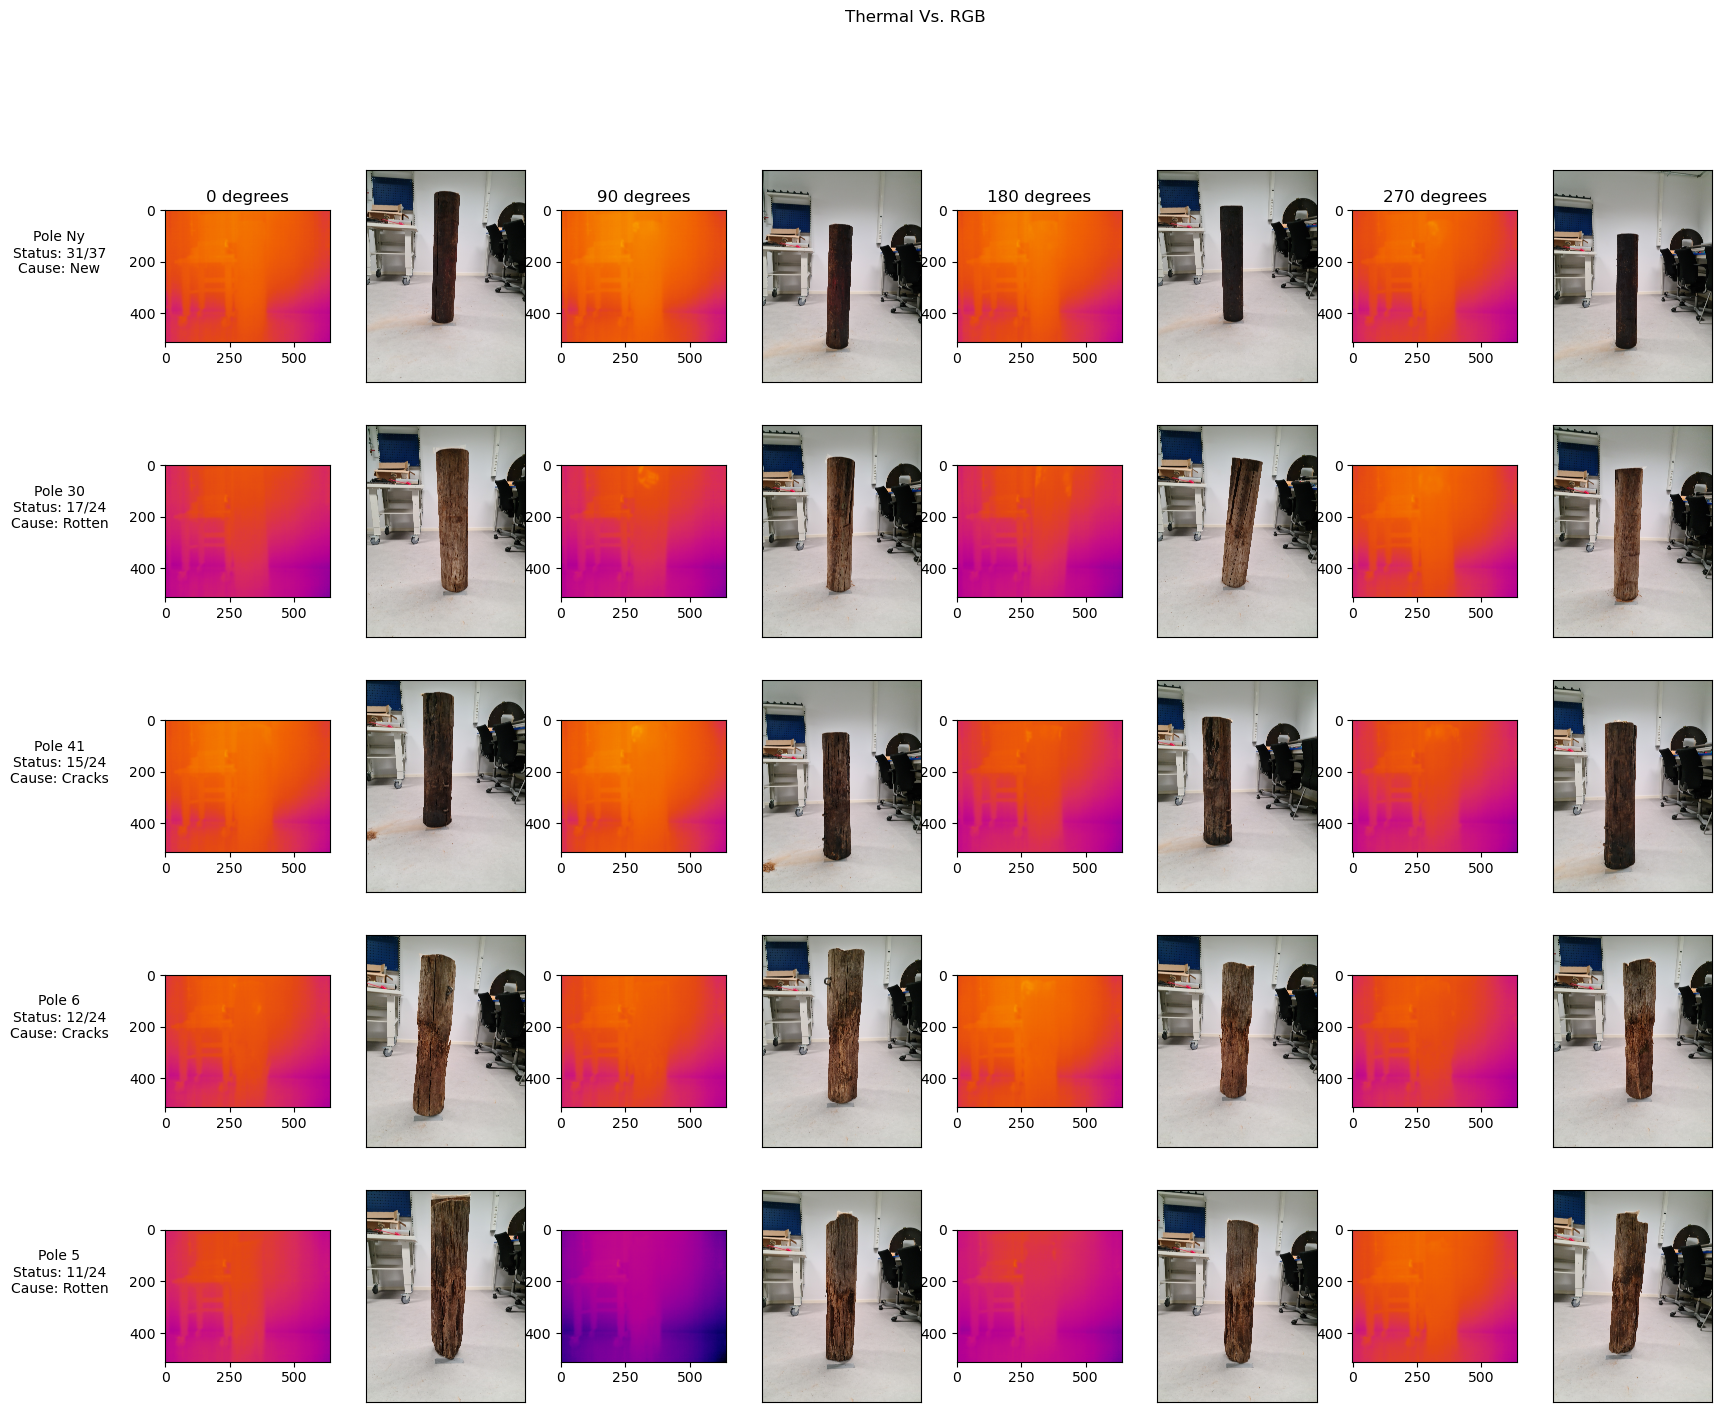

In [21]:
def plot_thermal_and_rgb():
    fig, axes = plt.subplots(5, 8, figsize=(20,16))
    pole_ids = ['Ny','30','41','6','5']
    pole_status = ['31/37', '17/24', '15/24', '12/24', '11/24']
    specific_status = ['New', 'Rotten', 'Cracks', 'Cracks', 'Rotten']

    for pole_idx, pole_id in enumerate(pole_ids):
        for rotation_idx, rotation in enumerate([0, 90, 180, 270]):
            thermal_img = cv2.imread(f'Thermal/{pole_id.lower()}_{rotation}.bmp')
            rgb_img = cv2.imread(f'RGB/{pole_id}_{rotation}.jpg')
            thermal_img = cv2.cvtColor(thermal_img, cv2.COLOR_BGR2RGB)
            rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
            axes[pole_idx, rotation_idx*2].imshow(thermal_img)
            axes[pole_idx, rotation_idx*2+1].imshow(rgb_img)
            axes[pole_idx, rotation_idx*2+1].set_xticks([])
            axes[pole_idx, rotation_idx*2+1].set_yticks([])

    fig.suptitle('Thermal Vs. RGB')

    [axes[0,i*2].set_title(f'{i*90} degrees') for i in range(4)]

    [axes[i,0].set_ylabel(f'Pole {pole}\nStatus: {pole_status[i]}\nCause: {specific_status[i]}', labelpad=50, fontdict={'rotation':0}) for i, pole in enumerate(pole_ids)]

    plt.savefig('thermal_vs_rgb.jpg')
    
plot_thermal_and_rgb()

By looking at the thermal images, it can be seen that, unfortunately, no clear pole information can be extracted from them. Not only is the pole difficult to isolate from the background, but there seem to be no remarkable characteristics that can help distinguish good poles from bad poles. Only a couple of things stand out:

- There are some thermal images which seem to be colder for some reason. Did the temperature of the room change, or perhaps this has actually something to do with the pole condition?
- In a bunch of the poles, there are sudden warmer parts above. My hypothesis is that this was caused by the process of rotating the pole by using the hands, which left a mark there